P = Tp/(Tp + Fp)
R = Tp/(Tp + Fn)

The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
Precision: How many selected items are relevant?
Recall: How many relevant items are selected?

High Precision --> Low Fp rate.
High Recall --> Low Fn rate.

Harmonic Mean of Precision and Recall (F1): F1 = 2 * (P*R)/(P+R)

Geometric Mean of Precision and Recall (G): G = squared_root(P * R)

Average precision (AP) summarizes such a plot as the weighted mean of Precisions achieved at each threshold, with the increase in Recall from the previous threshold used as the weight: 
AP = Sum_n(R_n - R_n-1)*P_n

Where P_n and R_n are the precision and recall at the nth threshold. A pair (R_k, P_k) is referred to as an operating point.

Precision-recall curves are typically used in binary classification to study the output of a classifier. In order to extend the precision-recall curve and average precision to multi-class or multi-label classification, it is necessary to binarize the output. One curve can be drawn per label, but one can also draw a precision-recall curve by considering each element of the label indicator matrix as a binary prediction (micro-averaging).

AP and the trapezoidal area under the operating points (sklearn.metrics.auc) are common ways to summarize a precision-recall curve that lead to different results. 

The AUC can be interpreted as the probability that the model generates a larger value for a sample randomly chosen from the positive class than for a sample randomly chosen from the negative class. It is a measure of predictive performance for a classifier. The ROC curve plots the true positive vs. the false positive rate as the discriminative threshold is varied between 0 and 1.

The PR (Precision/Recall) curve is an alternative when data is imbalanced. 

From the paper: "The state transition AUC can be useful for determining model performance for transitions of interest. For instance, a servicer may be interested in whether a mortgage which is 30 days delinquent will become even more delinquent (60 days delinquent) or return to current." 

In [29]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

In [4]:
# Create a simple classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

display(classifier)
display(X_train, y_train)
display(y_test, y_score)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2',
     random_state=<mtrand.RandomState object at 0x000001A70FAF6D38>,
     tol=0.0001, verbose=0)

array([[ 4.6       ,  3.6       ,  1.        , ...,  0.06881887,
         0.73902653,  0.26106667],
       [ 5.1       ,  3.8       ,  1.5       , ...,  1.41938754,
         0.74710667, -0.10630249],
       [ 5.5       ,  3.5       ,  1.3       , ...,  1.1038747 ,
         0.04572089, -0.31955085],
       ..., 
       [ 5.5       ,  2.5       ,  4.        , ..., -1.55673663,
         0.14321934, -1.24624422],
       [ 6.7       ,  3.        ,  5.        , ..., -0.20144195,
        -2.03835412,  0.76707069],
       [ 6.3       ,  2.3       ,  4.4       , ...,  1.38353355,
         0.71427849, -0.28417349]])

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1])

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0])

array([-0.20078873,  0.30423755,  0.20105913,  0.27523707,  0.42593232,
       -0.15043845, -0.08794778, -0.12733551,  0.22931435, -0.23913589,
       -0.06386273, -0.14958498, -0.04914892,  0.09898308,  0.05156143,
       -0.11429615,  0.18899632,  0.04871816, -0.08258227, -0.26105581,
        0.24693108, -0.18318469, -0.38385182,  0.26336702,  0.12585387,
       -0.03991333,  0.39424515,  0.42411475, -0.47904513, -0.30529129,
       -0.09282077,  0.01213395, -0.20204191,  0.40148907, -0.04536207,
        0.12179039,  0.06493686, -0.07007254,  0.0032903 , -0.39635824,
        0.02619399,  0.20018636,  0.06502152,  0.49589642, -0.28221988,
        0.31364507,  0.19062117,  0.11549291,  0.03145852,  0.22408626])

In [8]:
from sklearn.metrics import average_precision_score
# this take in account the score, it means that The confidence score for a sample 
# is the signed distance of that sample to the hyperplane. This makes sense because, the prediction could be done 
# taking different treshold in order to draw the precision-recall curve.
average_precision = average_precision_score(y_test, y_score) 

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.88


In [24]:
%matplotlib notebook

array([ 0.61904762,  0.6097561 ,  0.625     ,  0.64102564,  0.63157895,
        0.64864865,  0.66666667,  0.68571429,  0.67647059,  0.66666667,
        0.6875    ,  0.70967742,  0.73333333,  0.75862069,  0.75      ,
        0.77777778,  0.76923077,  0.76      ,  0.75      ,  0.7826087 ,
        0.77272727,  0.80952381,  0.8       ,  0.84210526,  0.88888889,
        0.88235294,  0.875     ,  0.93333333,  0.92857143,  0.92307692,
        0.91666667,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ])

array([ 1.        ,  0.96153846,  0.96153846,  0.96153846,  0.92307692,
        0.92307692,  0.92307692,  0.92307692,  0.88461538,  0.84615385,
        0.84615385,  0.84615385,  0.84615385,  0.84615385,  0.80769231,
        0.80769231,  0.76923077,  0.73076923,  0.69230769,  0.69230769,
        0.65384615,  0.65384615,  0.61538462,  0.61538462,  0.61538462,
        0.57692308,  0.53846154,  0.53846154,  0.5       ,  0.46153846,
        0.42307692,  0.42307692,  0.38461538,  0.34615385,  0.30769231,
        0.26923077,  0.23076923,  0.19230769,  0.15384615,  0.11538462,
        0.07692308,  0.03846154,  0.        ])

array([-0.20078873, -0.18318469, -0.15043845, -0.14958498, -0.12733551,
       -0.11429615, -0.09282077, -0.08794778, -0.08258227, -0.07007254,
       -0.06386273, -0.04914892, -0.04536207, -0.03991333,  0.0032903 ,
        0.01213395,  0.02619399,  0.03145852,  0.04871816,  0.05156143,
        0.06493686,  0.06502152,  0.09898308,  0.11549291,  0.12179039,
        0.12585387,  0.18899632,  0.19062117,  0.20018636,  0.20105913,
        0.22408626,  0.22931435,  0.24693108,  0.26336702,  0.27523707,
        0.30423755,  0.31364507,  0.39424515,  0.40148907,  0.42411475,
        0.42593232,  0.49589642])

<IPython.core.display.Javascript object>


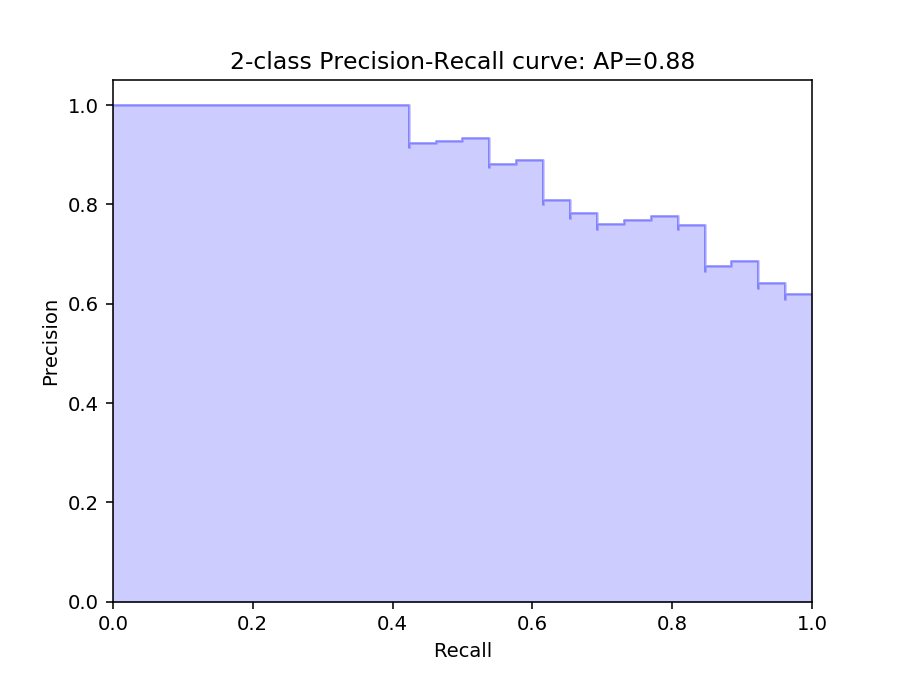

Text(0.5,1,'2-class Precision-Recall curve: AP=0.88')

In [17]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_score)

display(precision, recall, thresholds)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post') # to draw like a histogram distribution
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

<IPython.core.display.Javascript object>


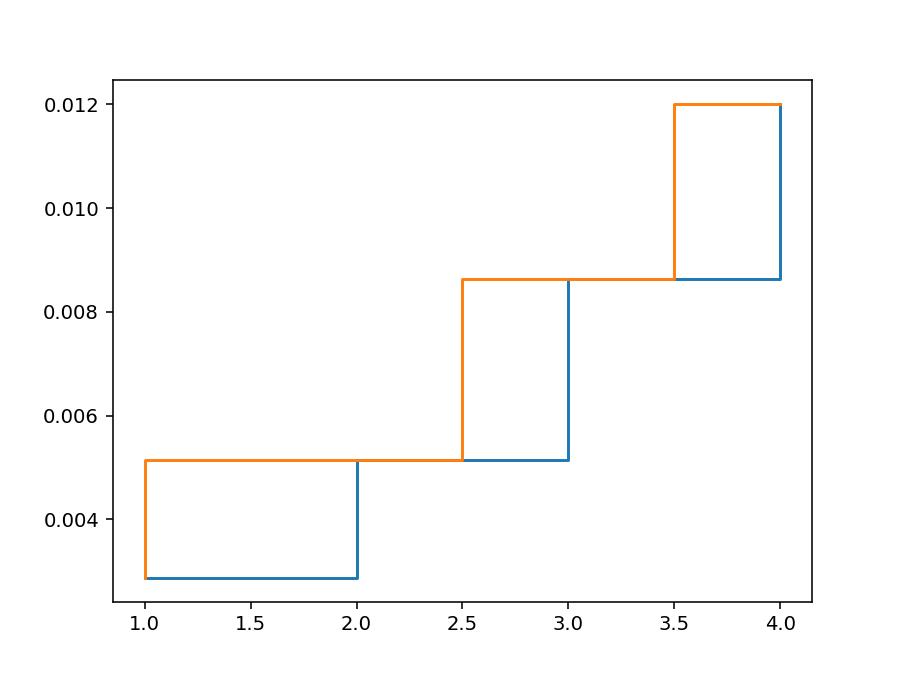

In [22]:
x = [1,2,3,4] 
y = [0.002871972681775004, 0.00514787917410944, 
     0.00863476098280219, 0.012003316194034325]

plt.step(x, y, where='post') #to follow the steps in a 'posterior' mode
plt.show()

<IPython.core.display.Javascript object>


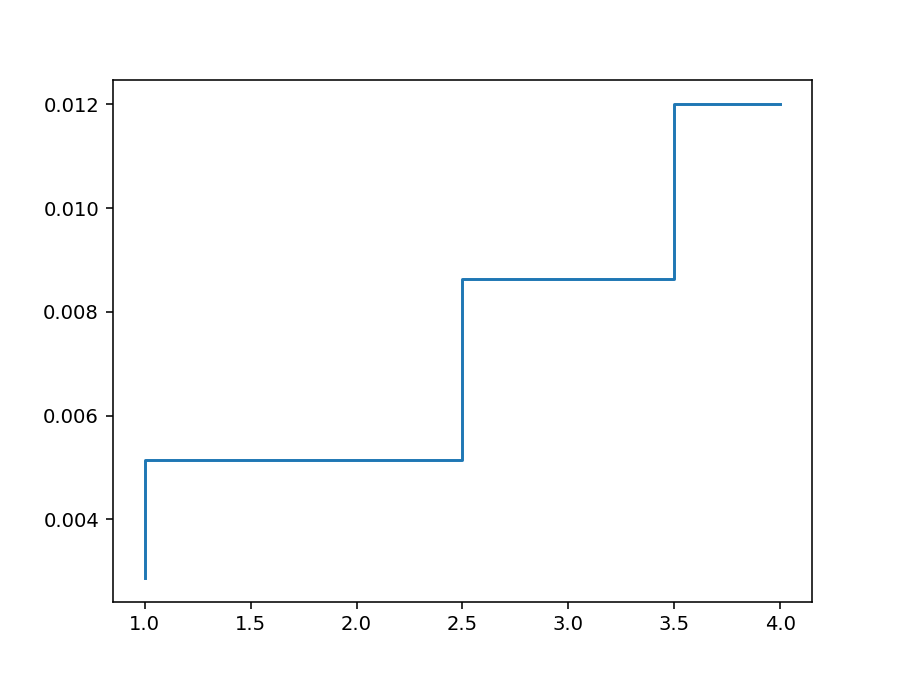

In [27]:
# If you have non-uniformly spaced data points, you can use the drawstyle keyword argument for plot:
x = [1,2.5,3.5,4] 
y = [0.002871972681775004, 0.00514787917410944, 
     0.00863476098280219, 0.012003316194034325]

plt.plot(x, y, drawstyle='steps-pre')
# Also available are steps-mid and steps-post.

In [32]:
from sklearn.preprocessing import label_binarize

# Use label_binarize to be multi-label like settings
Y = label_binarize(y, classes=[0, 1, 2])
n_classes = Y.shape[1]

display('labels: ', Y)

# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5,
                                                    random_state=random_state)
display ('Training Set: ')
display(X_train, Y_train)
display('Test Set:')
display(X_test, Y_test)

# We use OneVsRestClassifier for multi-label prediction
from sklearn.multiclass import OneVsRestClassifier

# Run classifier
classifier = OneVsRestClassifier(svm.LinearSVC(random_state=random_state))
classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)

display('y_score')
display(y_score) #one score for each label
display(len(X_test), len(y_score))


'labels: '

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

'Training Set: '

array([[ 5.6       ,  3.        ,  4.5       , ...,  0.67624334,
        -0.59919505,  0.33273388],
       [ 7.3       ,  2.9       ,  6.3       , ..., -0.32031979,
        -1.01073016, -0.44701666],
       [ 6.7       ,  3.        ,  5.2       , ..., -0.55450646,
        -1.49468645, -0.96512599],
       ..., 
       [ 4.3       ,  3.        ,  1.1       , ..., -1.49661305,
        -0.48277904, -0.54909171],
       [ 6.1       ,  2.6       ,  5.6       , ...,  0.31790944,
         2.30575267,  0.01622263],
       [ 4.9       ,  3.1       ,  1.5       , ..., -0.20273458,
        -0.25786648,  0.07081452]])

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1,

'Test Set:'

array([[ 6.4       ,  3.1       ,  5.5       , ...,  0.03905222,
         0.18889035, -1.90147317],
       [ 7.7       ,  2.6       ,  6.9       , ...,  1.85585173,
         0.34911351,  1.6937165 ],
       [ 5.        ,  3.6       ,  1.4       , ..., -0.03057244,
         1.57708821, -0.8128021 ],
       ..., 
       [ 5.8       ,  2.7       ,  4.1       , ...,  1.64406345,
        -1.88552839,  0.68372542],
       [ 5.5       ,  2.4       ,  3.8       , ..., -1.45468125,
         0.76849283, -1.36479174],
       [ 5.        ,  3.3       ,  1.4       , ...,  1.68985759,
         0.19996649, -1.2243307 ]])

array([[0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0,

'y_score'

array([[ -6.04406363e-01,  -5.08765455e-01,   8.42651480e-02],
       [ -8.30584488e-01,  -6.10169666e-01,   3.57258082e-01],
       [ -1.66426523e-01,  -2.90184294e-02,  -5.57149327e-01],
       [ -8.78592949e-01,  -1.08674718e-01,  -3.36410484e-02],
       [ -1.76145896e-01,  -1.86568828e-01,  -3.13651436e-01],
       [ -7.86093054e-01,  -3.67296711e-03,  -2.83896393e-01],
       [ -1.91375039e-01,  -7.18226749e-01,  -9.79294939e-02],
       [ -3.53467680e-01,  -8.10927704e-01,   3.99100008e-02],
       [ -1.74574691e-01,  -3.24741109e-01,  -2.19719859e-01],
       [  1.12122595e-01,  -4.78890201e-01,  -4.90235768e-01],
       [ -2.44410465e-01,   8.48577833e-02,  -4.64637615e-01],
       [ -3.43162543e-01,  -2.24321414e-01,  -8.89927501e-02],
       [ -6.16592000e-01,  -5.24715236e-01,   3.25214112e-01],
       [ -3.50818780e-01,   2.15912533e-01,  -5.32264356e-01],
       [ -1.52821572e-01,  -6.31272346e-01,  -1.73286832e-01],
       [ -8.64698949e-01,   2.37132156e-02,   3.4072654

75

75

In [34]:
print(Y_test.ravel()) # pack all by rows in one dimension
print(y_score.ravel())

[0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0
 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1
 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0
 1 0 0]
[ -6.04406363e-01  -5.08765455e-01   8.42651480e-02  -8.30584488e-01
  -6.10169666e-01   3.57258082e-01  -1.66426523e-01  -2.90184294e-02
  -5.57149327e-01  -8.78592949e-01  -1.08674718e-01  -3.36410484e-02
  -1.76145896e-01  -1.86568828e-01  -3.13651436e-01  -7.86093054e-01
  -3.67296711e-03  -2.83896393e-01  -1.91375039e-01  -7.18226749e-01
  -9.79294939e-02  -3.53467680e-01  -8.10927704e-01   3.99100008e-02
  -1.74574691e-01  -3.24741109e-01  -2.19719859e-01   1.12122595e-01
  -4.78890201e-01  -4.90235768e-01  -2.44410465e-01   8.485

In [91]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()

#calculating the precision and recall per class:
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())

average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

display('recall dictionary: ')
# display(len(values) for i,values in recall.items())
for i,values in recall.items(): print(i, len(values))
display(recall)


display('precision dictionary: ')
for i,values in precision.items(): print(i, len(values))
display(precision)

display('average precision dictionary: ')
display(average_precision)

Average precision score, micro-averaged over all classes: 0.46


'recall dictionary: '

0 45
1 72
2 75
micro 206


{0: array([ 1.        ,  0.95833333,  0.91666667,  0.91666667,  0.91666667,
         0.91666667,  0.875     ,  0.83333333,  0.83333333,  0.83333333,
         0.83333333,  0.83333333,  0.83333333,  0.79166667,  0.79166667,
         0.79166667,  0.75      ,  0.70833333,  0.70833333,  0.70833333,
         0.70833333,  0.66666667,  0.625     ,  0.58333333,  0.54166667,
         0.5       ,  0.5       ,  0.45833333,  0.45833333,  0.45833333,
         0.41666667,  0.375     ,  0.33333333,  0.29166667,  0.29166667,
         0.25      ,  0.20833333,  0.20833333,  0.16666667,  0.16666667,
         0.125     ,  0.08333333,  0.04166667,  0.        ,  0.        ]),
 1: array([ 1.        ,  0.96296296,  0.96296296,  0.96296296,  0.96296296,
         0.96296296,  0.92592593,  0.92592593,  0.88888889,  0.85185185,
         0.85185185,  0.85185185,  0.85185185,  0.81481481,  0.77777778,
         0.74074074,  0.74074074,  0.7037037 ,  0.7037037 ,  0.66666667,
         0.66666667,  0.66666667,  0.629629

'precision dictionary: '

0 45
1 72
2 75
micro 206


{0: array([ 0.54545455,  0.53488372,  0.52380952,  0.53658537,  0.55      ,
         0.56410256,  0.55263158,  0.54054054,  0.55555556,  0.57142857,
         0.58823529,  0.60606061,  0.625     ,  0.61290323,  0.63333333,
         0.65517241,  0.64285714,  0.62962963,  0.65384615,  0.68      ,
         0.70833333,  0.69565217,  0.68181818,  0.66666667,  0.65      ,
         0.63157895,  0.66666667,  0.64705882,  0.6875    ,  0.73333333,
         0.71428571,  0.69230769,  0.66666667,  0.63636364,  0.7       ,
         0.66666667,  0.625     ,  0.71428571,  0.66666667,  0.8       ,
         0.75      ,  0.66666667,  0.5       ,  0.        ,  1.        ]),
 1: array([ 0.38028169,  0.37142857,  0.37681159,  0.38235294,  0.3880597 ,
         0.39393939,  0.38461538,  0.390625  ,  0.38095238,  0.37096774,
         0.37704918,  0.38333333,  0.38983051,  0.37931034,  0.36842105,
         0.35714286,  0.36363636,  0.35185185,  0.35849057,  0.34615385,
         0.35294118,  0.36      ,  0.346938

'average precision dictionary: '

{0: 0.65806047677897106,
 1: 0.4135302639880063,
 2: 0.48845170955634831,
 'micro': 0.45551006751552447}

In [7]:
# to calculate precision: this take in account the predict labels, but not the threshold to manipulate the predictions.
from sklearn.metrics import precision_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]

#Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
display(precision_score(y_true, y_pred, average='macro')) # (0.66667 + 0 + 0) / 3

# Calculate metrics globally by counting the total true positives, false negatives and false positives.
display(precision_score(y_true, y_pred, average='micro')) # 2/6

# Calculate metrics for each label, and find their average, weighted by support 
# (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; 
# it can result in an F-score that is not between precision and recall.
display(precision_score(y_true, y_pred, average='weighted')) # (0.66667*w1 + 0*w2 + 0*w3) / 3 
# weight is an array of proportions according the true positives in each class: w =[1, 0, 0]

# If None, the scores for each class are returned
display(precision_score(y_true, y_pred, average=None)) # [2/3, 0/1, 0/1]

0.22222222222222221

0.33333333333333331

0.22222222222222221

array([ 0.66666667,  0.        ,  0.        ])

<IPython.core.display.Javascript object>


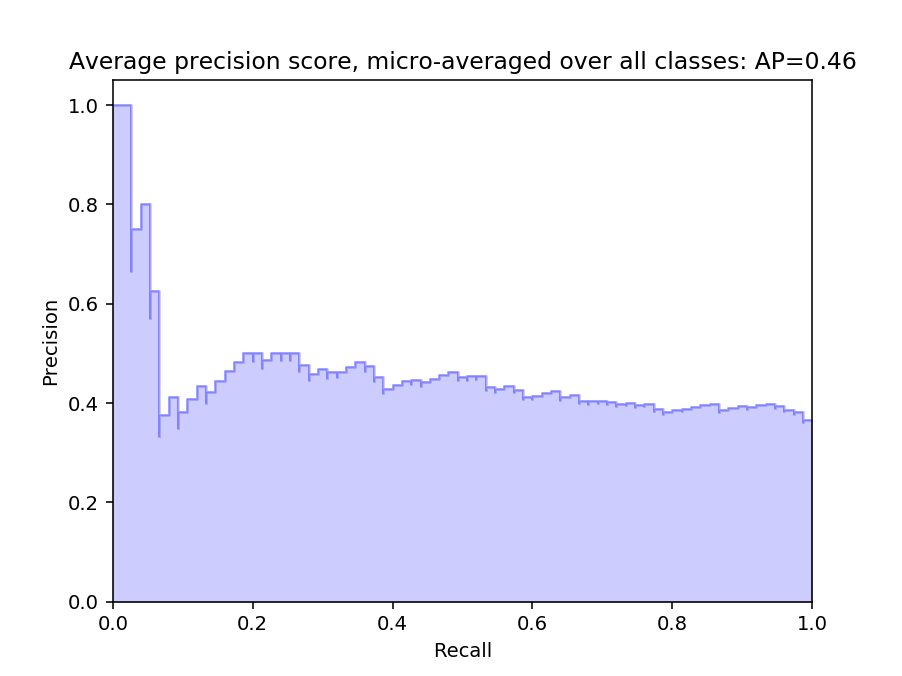

Text(0.5,1,'Average precision score, micro-averaged over all classes: AP=0.46')

In [38]:
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

In [45]:
f_scores = np.linspace(0.2, 0.8, num=4)
display(f_scores)
x = np.linspace(0.01, 1)
display(x)
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
display(colors)

array([ 0.2,  0.4,  0.6,  0.8])

array([ 0.01      ,  0.03020408,  0.05040816,  0.07061224,  0.09081633,
        0.11102041,  0.13122449,  0.15142857,  0.17163265,  0.19183673,
        0.21204082,  0.2322449 ,  0.25244898,  0.27265306,  0.29285714,
        0.31306122,  0.33326531,  0.35346939,  0.37367347,  0.39387755,
        0.41408163,  0.43428571,  0.4544898 ,  0.47469388,  0.49489796,
        0.51510204,  0.53530612,  0.5555102 ,  0.57571429,  0.59591837,
        0.61612245,  0.63632653,  0.65653061,  0.67673469,  0.69693878,
        0.71714286,  0.73734694,  0.75755102,  0.7777551 ,  0.79795918,
        0.81816327,  0.83836735,  0.85857143,  0.87877551,  0.89897959,
        0.91918367,  0.93938776,  0.95959184,  0.97979592,  1.        ])

<IPython.core.display.Javascript object>


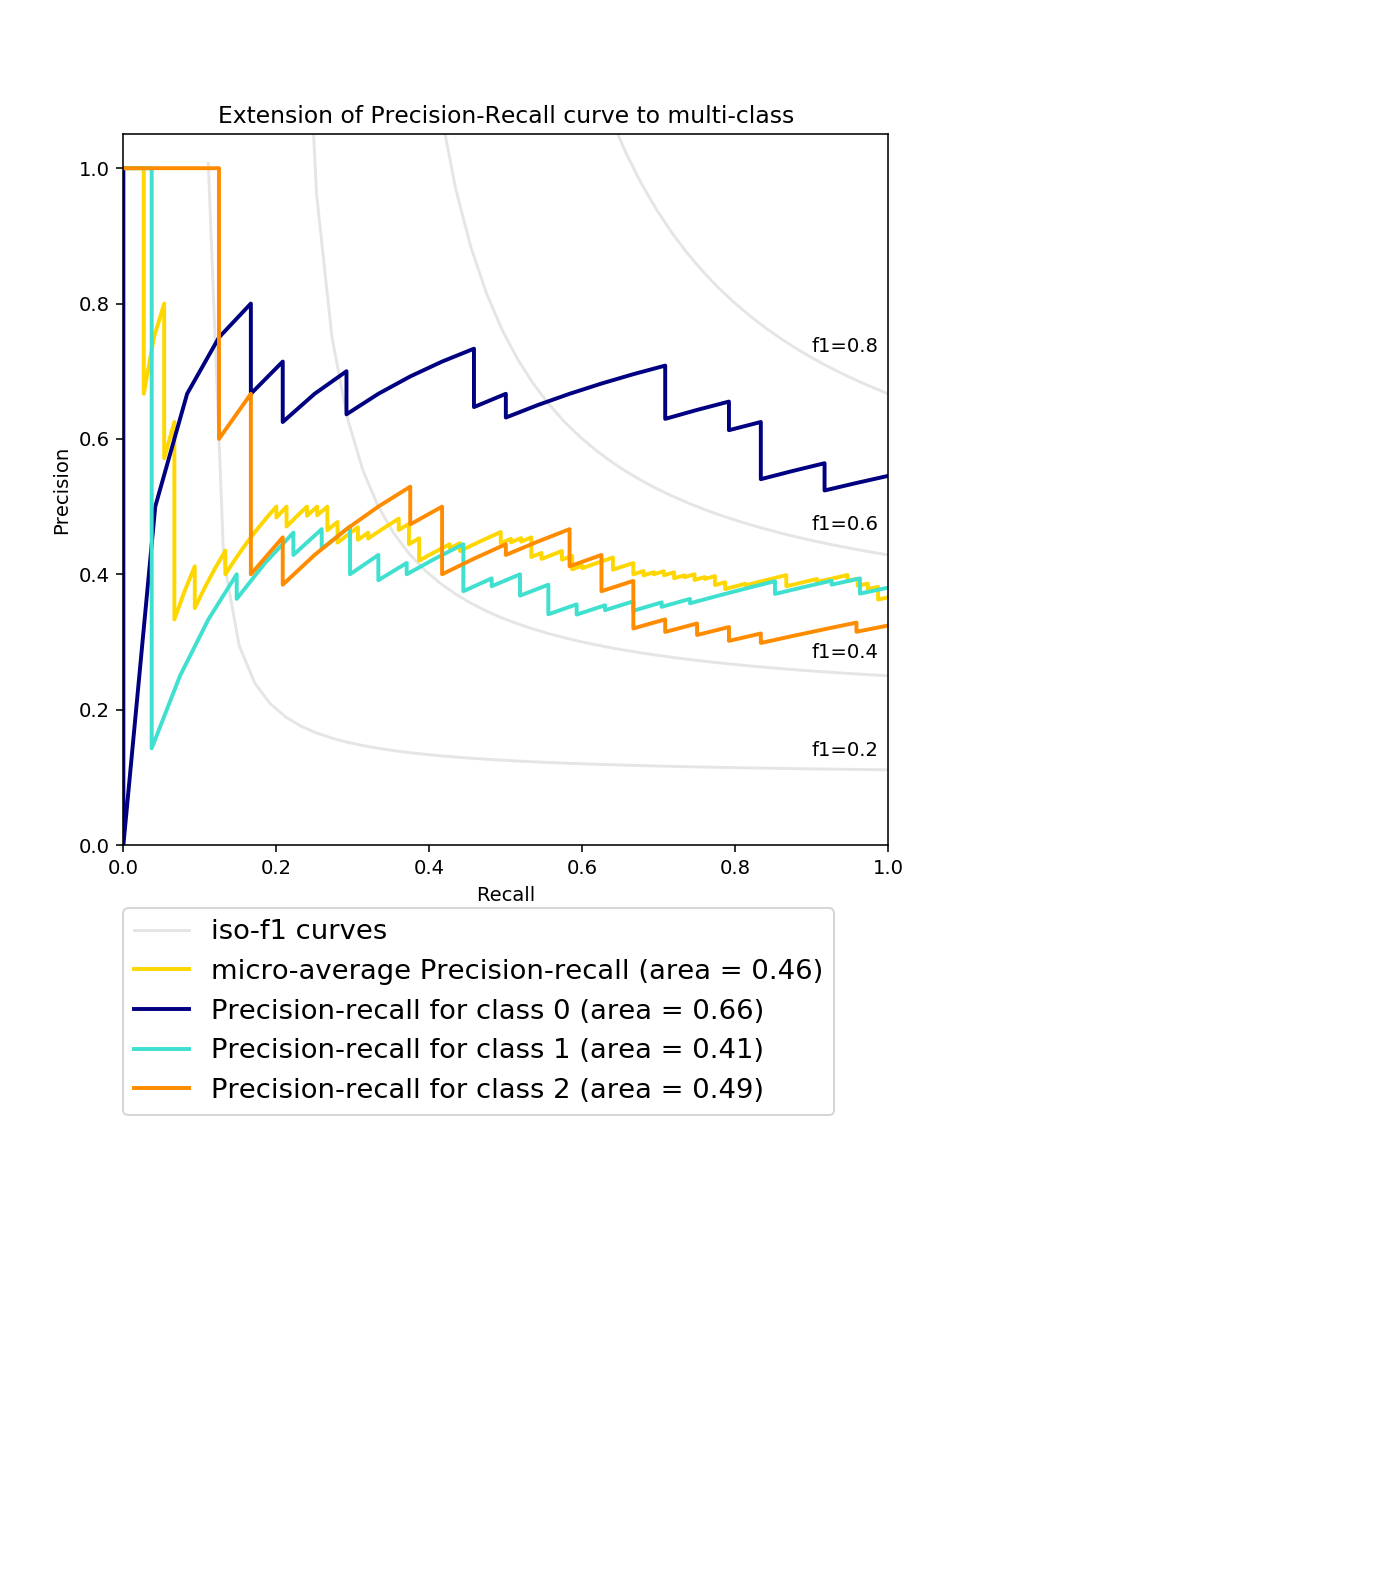

In [99]:
from itertools import cycle
# setup plot details
#one color for each recall-precision curve and one for a f_scores curve:
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i])) # area = Average Precision AP per class.

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()

In [46]:
# For an alternative way to summarize a precision-recall curve, see average_precision_score (AP).
# This is a general function, given points on a curve.
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
metrics.auc(fpr, tpr) # this is AUC for ROC Curve

0.75

In [47]:
# for a multilabel problem using auc for PR Curve:

#calculating AUC under PR Curve for each class:
AUC_PR = dict()
for i in range(n_classes):    
    AUC_PR[i] = metrics.auc(recall[i], precision[i])

AUC_PR["micro"] = metrics.auc(recall["micro"], precision["micro"])

display(AUC_PR)

{0: 0.63308552725282552,
 1: 0.40031768069122031,
 2: 0.47814697183915233,
 'micro': 0.44987963495514671}

<IPython.core.display.Javascript object>


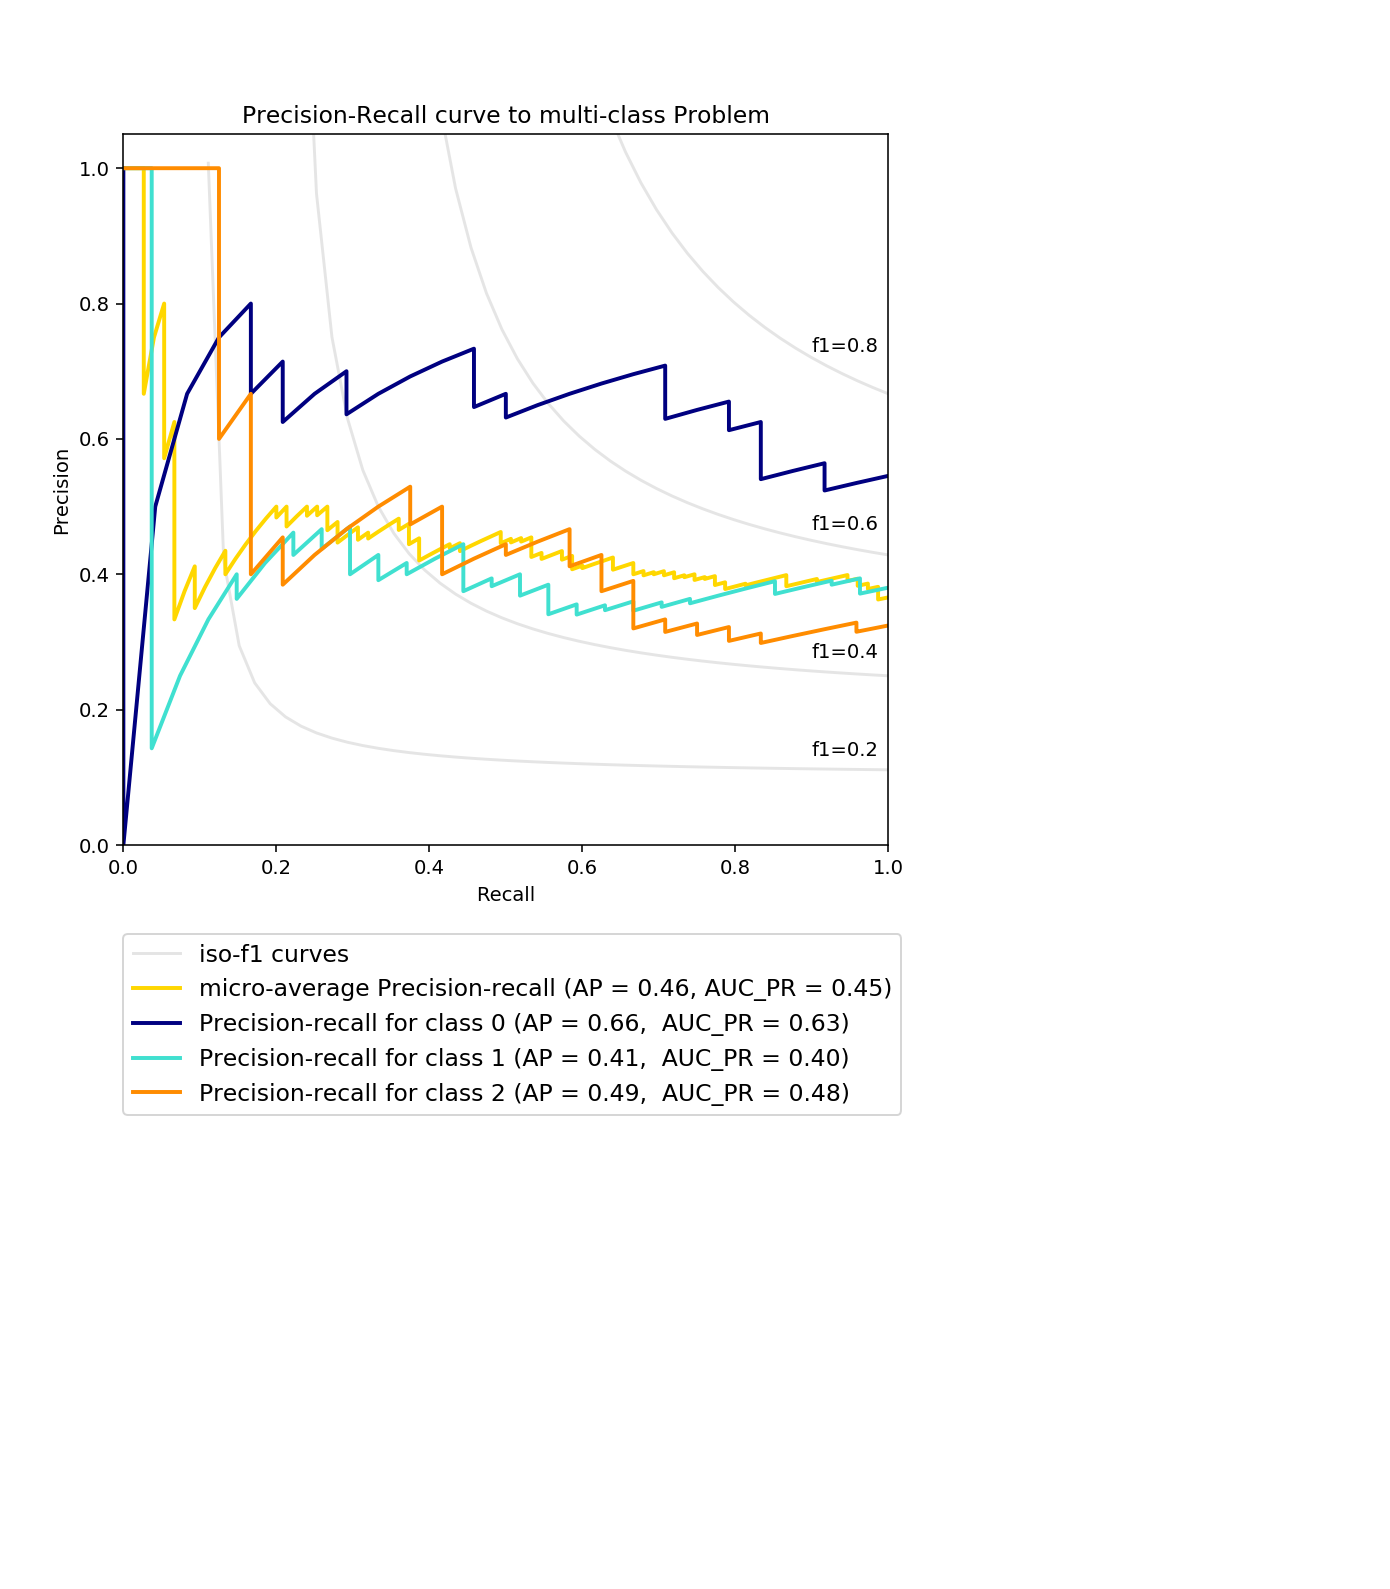

In [51]:
# plotting the results together:    
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (AP = {0:0.2f},'
              ''.format(average_precision["micro"]) + ' AUC_PR = {0:0.2f})'.format(AUC_PR["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (AP = {1:0.2f}, '
                  ''.format(i, average_precision[i]) + ' AUC_PR = {0:0.2f})'.format(AUC_PR[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve to multi-class Problem')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=12))


plt.show()

In [ ]:
#PR curve for tensorflow model with several classes:
with tf.name_scope('probabilities'):
    self.probabilities = tf.nn.softmax(self.scores)

with pr_sess.as_default():    
    for cat in range(y_train.shape[1]):
        with tf.name_scope('%s' % labels[cat]):
            _, update_op = summary_lib.pr_curve_streaming_op('pr_curve', predictions=probs[:, cat], labels=tf.cast(y_test[:, cat], tf.bool), num_thresholds=500, metrics_collections='pr')
        pr_summary_op = tf.summary.merge_all()

# tf.contrib.metrics.streaming_auc:
streaming_auc(
    predictions,
    labels,
    weights=None,
    num_thresholds=200,
    metrics_collections=None,
    updates_collections=None,
    curve='ROC',
    name=None
)
Computes the approximate AUC via a Riemann sum.
The streaming_auc function creates four local variables, true_positives, true_negatives, false_positives and false_negatives that are used to compute the AUC. To discretize the AUC curve, a linearly spaced set of thresholds is used to compute pairs of recall and precision values. The area under the ROC-curve is therefore computed using the height of the recall values by the false positive rate, while the area under the PR-curve is the computed using the height of the precision values by the recall.

predictions: A floating point Tensor of arbitrary shape and whose values are in the range [0, 1].

labels: A bool Tensor whose shape matches predictions.

In [105]:
from tensorboard import summary as summary_lib
import tensorflow as tf

labels = tf.constant([False, True, True, False, True], dtype=tf.bool)
predictions = tf.random_uniform(labels.get_shape(), maxval=1.0)

print(labels)

print(predictions)

with tf.Session() as sess:
    print(labels.eval(session=sess))
    print(predictions.eval(session=sess))
    p = tf.Print(predictions, [predictions], message='Predictions: ') # is a print operation, but it is tensor type :(
    print(p)

Tensor("Const_21:0", shape=(5,), dtype=bool)
Tensor("random_uniform_14:0", shape=(5,), dtype=float32)
[False  True  True False  True]
[ 0.00486302  0.00578976  0.10038793  0.29680502  0.25536239]
Tensor("Print_11:0", shape=(5,), dtype=float32)


In [74]:
# Initialize session
import tensorflow as tf
sess = tf.InteractiveSession()

# Some tensor we want to print the value of
a = tf.constant([1.0, 3.0])

# Add print operation
a = tf.Print(a, [a], message="This is a: ")

# Add more elements of the graph using a
b = tf.add(a, a)
print(b.eval()) # without session because this is using an interactive session!!

print(a.eval())

[ 2.  6.]
[ 1.  3.]


In [97]:
import tensorflow as tf

#define a variable to hold normal random values 
normal_rv = tf.Variable( tf.truncated_normal([2,3],stddev = 0.1))

#initialize the variable
init_op = tf.initialize_all_variables() # deprecated!!

#run the graph
with tf.Session() as sess:
    sess.run(init_op) #execute init_op
    #print the random values that we sample
    print (sess.run(normal_rv))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
[[ 0.04574807  0.06474843 -0.03482213]
 [ 0.01121939 -0.01417601 -0.00331384]]


In [107]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # to delete the previous defined variables in previous runs.
    # this define the operation:
    curve, update_op = summary_lib.pr_curve_streaming_op('pr_curve', predictions=predictions, labels=labels, num_thresholds=11)
    # 'curve' is a precisionRecallData named tuple, which contains several ops for
    # precision-recall related data (precision, recall, TP, FP, TN, FN)
    merged_summary = tf.summary.merge_all()

    writer = tf.summary.FileWriter('/tmp/logdir1', sess.graph)    
    sess.run(tf.local_variables_initializer())
    for step in range(43):
        # print(step)
        sess.run([update_op]) #in each 'run' call, the predictions are calculated again.
        print(labels.eval(session=sess))
        print(predictions.eval(session=sess))        
        # print(curve[0].eval(session=sess))
        if step % 3 == 0: #varying the number of times to execute the summary operation
            print('step summary: ', step)
            writer.add_summary(sess.run(merged_summary), global_step=step) # each 6 steps draw the last result in the tensor summary

[False  True  True False  True]
[ 0.03171408  0.42725134  0.46701372  0.41637313  0.43136024]
step summary:  0


UnimplementedError: Cast string to bool is not supported
	 [[Node: pr_curve_12/false_positives/Cast_2 = Cast[DstT=DT_BOOL, SrcT=DT_STRING, _device="/job:localhost/replica:0/task:0/device:CPU:0"](pr_curve_12/false_positives/Cast_2/x)]]

Caused by op 'pr_curve_12/false_positives/Cast_2', defined at:
  File "C:\Users\sandr\AppData\Local\conda\conda\envs\tensorflowenvironment\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\sandr\AppData\Local\conda\conda\envs\tensorflowenvironment\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\sandr\AppData\Local\conda\conda\envs\tensorflowenvironment\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\sandr\AppData\Local\conda\conda\envs\tensorflowenvironment\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\sandr\AppData\Local\conda\conda\envs\tensorflowenvironment\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    self.io_loop.start()
  File "C:\Users\sandr\AppData\Local\conda\conda\envs\tensorflowenvironment\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\sandr\AppData\Local\conda\conda\envs\tensorflowenvironment\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\sandr\AppData\Local\conda\conda\envs\tensorflowenvironment\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\sandr\AppData\Local\conda\conda\envs\tensorflowenvironment\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\sandr\AppData\Local\conda\conda\envs\tensorflowenvironment\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\sandr\AppData\Local\conda\conda\envs\tensorflowenvironment\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\sandr\AppData\Local\conda\conda\envs\tensorflowenvironment\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\sandr\AppData\Local\conda\conda\envs\tensorflowenvironment\lib\site-packages\ipykernel\kernelbase.py", line 281, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\sandr\AppData\Local\conda\conda\envs\tensorflowenvironment\lib\site-packages\ipykernel\kernelbase.py", line 232, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\sandr\AppData\Local\conda\conda\envs\tensorflowenvironment\lib\site-packages\ipykernel\kernelbase.py", line 397, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\sandr\AppData\Local\conda\conda\envs\tensorflowenvironment\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\sandr\AppData\Local\conda\conda\envs\tensorflowenvironment\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\sandr\AppData\Local\conda\conda\envs\tensorflowenvironment\lib\site-packages\IPython\core\interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\sandr\AppData\Local\conda\conda\envs\tensorflowenvironment\lib\site-packages\IPython\core\interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\sandr\AppData\Local\conda\conda\envs\tensorflowenvironment\lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-101-ddfc614fbb8e>", line 2, in <module>
    curve, update_op = summary_lib.pr_curve_streaming_op('pr_curve', predictions=predictions, labels=labels, num_thresholds=11)
  File "C:\Users\sandr\AppData\Local\conda\conda\envs\tensorflowenvironment\lib\site-packages\tensorboard\plugins\pr_curve\summary.py", line 301, in streaming_op
    weights=weights)
  File "C:\Users\sandr\AppData\Local\conda\conda\envs\tensorflowenvironment\lib\site-packages\tensorflow\python\ops\metrics_impl.py", line 1504, in false_positives_at_thresholds
    labels, predictions, thresholds, weights=weights, includes=('fp',))
  File "C:\Users\sandr\AppData\Local\conda\conda\envs\tensorflowenvironment\lib\site-packages\tensorflow\python\ops\metrics_impl.py", line 463, in _confusion_matrix_at_thresholds
    labels=math_ops.cast(labels, dtype=dtypes.bool),
  File "C:\Users\sandr\AppData\Local\conda\conda\envs\tensorflowenvironment\lib\site-packages\tensorflow\python\ops\math_ops.py", line 758, in cast
    return gen_math_ops.cast(x, base_type, name=name)
  File "C:\Users\sandr\AppData\Local\conda\conda\envs\tensorflowenvironment\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 1007, in cast
    "Cast", x=x, DstT=DstT, name=name)
  File "C:\Users\sandr\AppData\Local\conda\conda\envs\tensorflowenvironment\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\sandr\AppData\Local\conda\conda\envs\tensorflowenvironment\lib\site-packages\tensorflow\python\framework\ops.py", line 3160, in create_op
    op_def=op_def)
  File "C:\Users\sandr\AppData\Local\conda\conda\envs\tensorflowenvironment\lib\site-packages\tensorflow\python\framework\ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

UnimplementedError (see above for traceback): Cast string to bool is not supported
	 [[Node: pr_curve_12/false_positives/Cast_2 = Cast[DstT=DT_BOOL, SrcT=DT_STRING, _device="/job:localhost/replica:0/task:0/device:CPU:0"](pr_curve_12/false_positives/Cast_2/x)]]
